## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

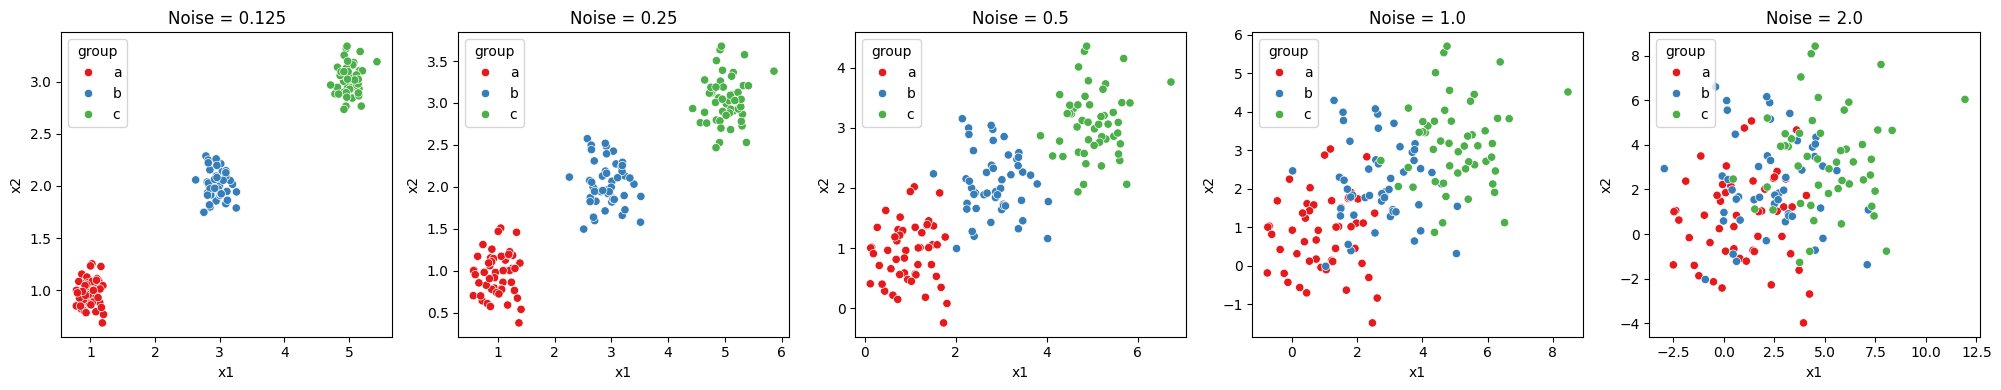

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# list of datasets and corresponding noise levels
datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

# create scatterplots
plt.figure(figsize=(20, 4))
for i, (df, noise) in enumerate(zip(datasets, noise_levels)):
    plt.subplot(1, 5, i+1)
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='Set1')
    plt.title(f'Noise = {noise}')
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.tight_layout()
plt.show()

# 0.125: clusters are very tight and clearly separated
# 0.25: clusters remain distinct but slightly more spread out
# 0.5: clusters start to overlap, boundaries less clear.
# 1.0: clusters overlap heavily, it's harder to visually separate them
# 2.0: clusters almost completely merge, difficult to distinguish groups visually

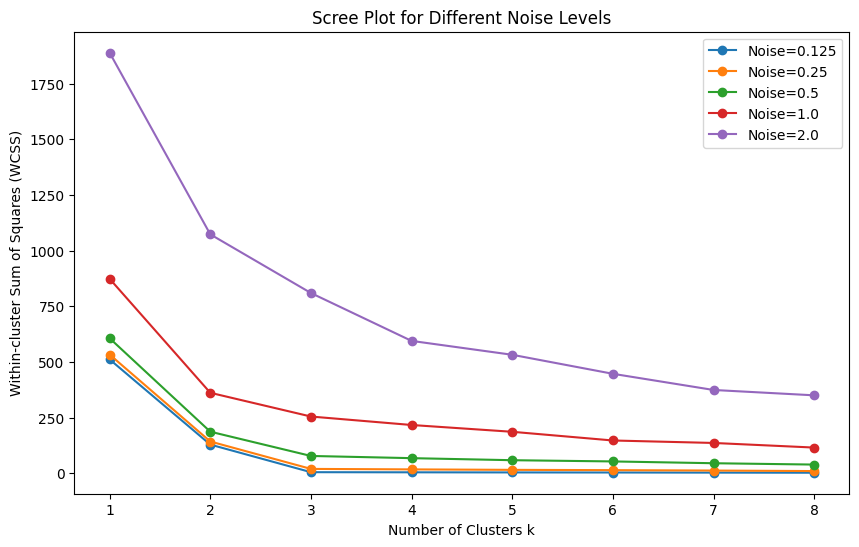

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def scree_plot(df, max_k=8):
    X = df[['x1','x2']]
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # sum of squared distances to cluster centers
    return wcss

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

plt.figure(figsize=(10,6))
for df, noise in zip(datasets, noise_levels):
    wcss = scree_plot(df)
    plt.plot(range(1, 9), wcss, marker='o', label=f'Noise={noise}')

plt.xlabel('Number of Clusters k')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Scree Plot for Different Noise Levels')
plt.legend()
plt.show()

# Low Noise Levels: show a clearer elbow pattern, especially visible between k=2
# and k=3, # make it easier to select an appropriate k
# High Noise Levels: show less of a distinct elbow, curve flattens out more
# gradually, # especially at higher k-values, harder to pinpoint a definitive
# elbow, noise seems to make the cluster separation less distinct

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [10]:
import pandas as pd

df = pd.read_csv('2022 election cycle fundraising.csv')

money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

for col in money_cols:
    # remove $ and commas
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)
    # replace ####### with NaN
    df[col] = df[col].replace('#######', pd.NA)
    # convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head(10)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0
5,5,Adriano Espaillat,Democratic,New York,House,1178693,888437,392705,0
6,6,Al Green,Democratic,Texas,House,346571,289586,296791,50000
7,7,Al Lawson,Democratic,Florida,House,593604,522650,238345,0
8,8,Alan Lowenthal,Democratic,California,House,181286,288295,285025,0
9,9,Albio Sires,Democratic,New Jersey,House,204340,284473,128200,0


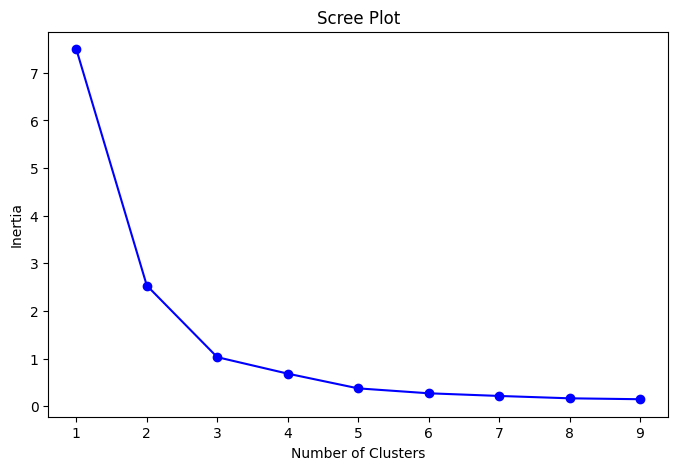

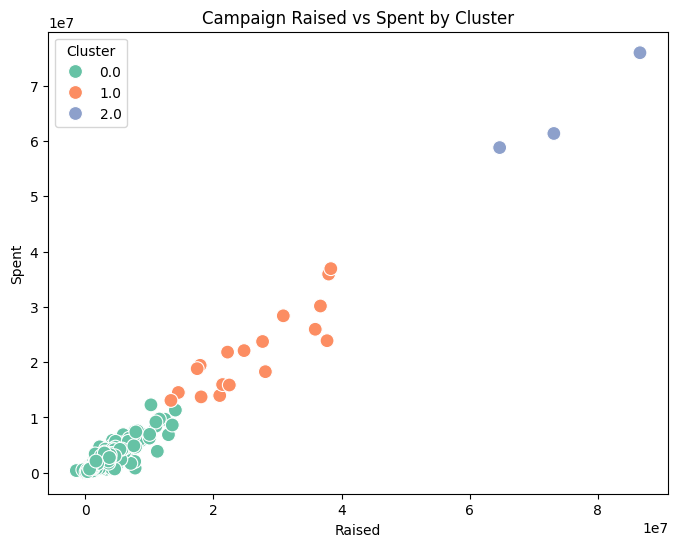

                     Member    Raised     Spent  Cluster
2               Adam Schiff  20993041  13957854      1.0
87   Catherine Cortez Masto  37993811  35928936      1.0
89            Chuck Schumer  35899966  25944350      1.0
115            Dan Crenshaw  14535870  14512435      1.0
261            John Kennedy  28119082  18276565      1.0
290            Katie Porter  21441693  15946876      1.0
298          Kevin McCarthy  24791538  22086344      1.0
326           Maggie Hassan  30914830  28380992      1.0
328             Marco Rubio  36709285  30153111      1.0
340              Mark Kelly  73140886  61357281      2.0
357          Michael Bennet  18086343  13713611      1.0
390            Nancy Pelosi  22216583  21814643      1.0
402            Patty Murray  13377243  13073248      1.0
414               Rand Paul  22490627  15865010      1.0
417         Raphael Warnock  86581469  75959810      2.0
442             Ron Johnson  27680901  23731653      1.0
476           Steve Scalise  17

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Raised', 'Spent']].dropna()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# scree plot to find optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='Set2', s=100)
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.title('Campaign Raised vs Spent by Cluster')
plt.show()

cluster_sizes = df['Cluster'].value_counts().sort_values()
smallest_clusters = cluster_sizes.index[:2]
smallest_politicians = df[df['Cluster'].isin(smallest_clusters)][['Member', 'Raised', 'Spent', 'Cluster']]
print(smallest_politicians)

# The smallest cluster (Cluster 2) represents the extremely high-dollar
# fundraisers, # not the low-dollar ones. They stand out as outliers at the top-
# right corner of the Raised vs Spent plot. Cluster 2 (the smallest cluster) has
# only 3 members: Mark Kelly, Raphael Warnock, and Val Demings. Cluster 1 is
# much larger, containing everyone else.

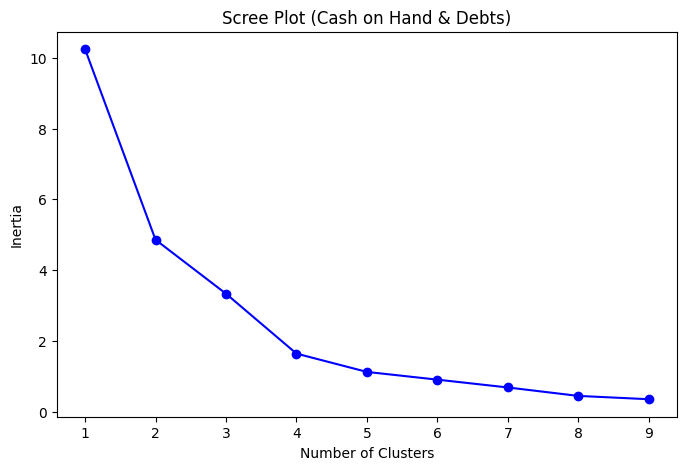

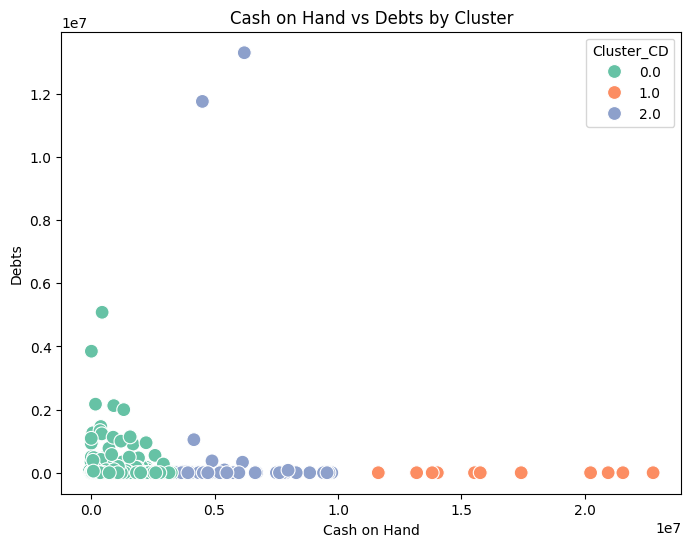

                       Member  Cash on Hand    Debts  Cluster_CD
2                 Adam Schiff      20942888        0         1.0
11               Alex Padilla       7617654     5703         2.0
12   Alexandria Ocasio-Cortez       5940454        0         2.0
45             Bernie Sanders       9751125        0         2.0
49                Bill Foster       4164390  1046178         2.0
..                        ...           ...      ...         ...
498                 Tim Kaine       3922102        0         2.0
500                 Tim Scott      21539824        0         1.0
503                Todd Young       5501025        0         2.0
506                Tom Cotton       7980477    77959         2.0
523               Val Demings       6647641        0         2.0

[61 rows x 4 columns]


In [16]:
Y = df[['Cash on Hand', 'Debts']].dropna()

scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot (Cash on Hand & Debts)')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df.loc[Y.index, 'Cluster_CD'] = kmeans.fit_predict(Y_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_CD', palette='Set2', s=100)
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.title('Cash on Hand vs Debts by Cluster')
plt.show()

cluster_sizes_cd = df['Cluster_CD'].value_counts().sort_values()
smallest_clusters_cd = cluster_sizes_cd.index[:2]
smallest_politicians_cd = df[df['Cluster_CD'].isin(smallest_clusters_cd)][['Member', 'Cash on Hand', 'Debts', 'Cluster_CD']]
print(smallest_politicians_cd)

# Cluster 1 contains mega-cash candidates like Adam Schiff and Tim Scott – high
# cash on hand, low or zero debts. Cluster 2 is much larger and contains most
# other candidates with moderate cash or some debts. In the Raised vs Spent
# clustering, the smallest cluster was the "mega-raisers/spenders." In the Cash
# vs Debts clustering, the cluster composition shifts because high cash on hand
# is not identical to total raised/spent. Raised and Spent track flow of money,
# capturing campaign activity, while Cash on Hand and Debts track net financial
# position at a point in time. Spending decisions, leftover funds, and debt
# levels create different clustering patterns.

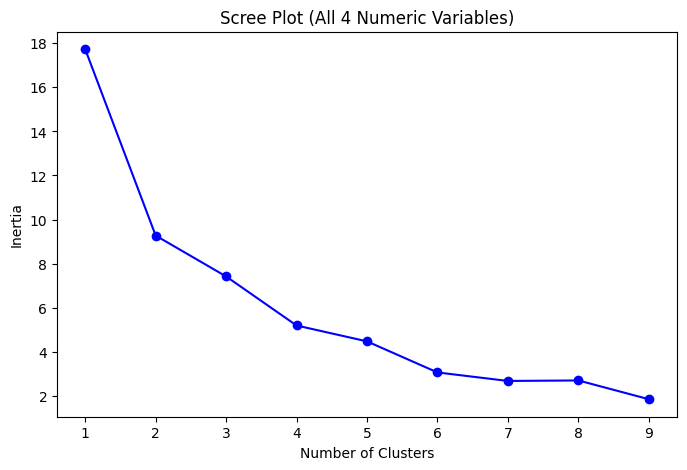

Cluster_All
0.0    514
1.0     21
2.0      2
Name: count, dtype: int64
                 Member    Raised     Spent  Cash on Hand   Debts  Cluster_All
0    Abigail Spanberger   7719396   7449678        851851       0          0.0
1        Adam Kinzinger   2192741   1243502       2472888       0          0.0
2           Adam Schiff  20993041  13957854      20942888       0          1.0
3            Adam Smith   1211111   1173466        623472       0          0.0
4          Adrian Smith   1617611   1664674       1098579       0          0.0
..                  ...       ...       ...           ...     ...          ...
532     William Timmons    892064    823955         76799  391742          0.0
533           Young Kim   7900497   7380035        928803   94940          0.0
534       Yvette Clarke    684268    662375         93513   49480          0.0
535      Yvette Herrell   3777731   2746661       1085613       0          0.0
536         Zoe Lofgren   1679466   2103190        736813   

In [17]:
Z = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].dropna()

scaler = MinMaxScaler()
Z_scaled = scaler.fit_transform(Z)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Z_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot (All 4 Numeric Variables)')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df.loc[Z.index, 'Cluster_All'] = kmeans.fit_predict(Z_scaled)

cluster_sizes_all = df['Cluster_All'].value_counts()
print(cluster_sizes_all)

smallest_clusters_all = cluster_sizes_all.index[:2]
smallest_politicians_all = df[df['Cluster_All'].isin(smallest_clusters_all)][['Member', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster_All']]
print(smallest_politicians_all)

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?